# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\KARTIK NEGI\Desktop\Student Grades Prediction.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.shape

(571, 43)

In [6]:
df.describe()
## as we can see that only our target variable is of continuos nature therefore, 
## it is necessary to convert the rest of the features (Categorical) into numerical values

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

from above we can see that there are some null values present, now we will check how many null values are there

In [79]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
df['HS-101'].unique()

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

### As the null values can be filled with F grade because if a person is an absentee he will get the least grade.

In [10]:
df=df.fillna('F')

In [11]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [15]:
df=df.drop(['Seat No.'],axis=1)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [16]:
df.iloc[:,:-1]
## Showing all the features except the target variable 'CGPA'

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [17]:
df.iloc[:,:-1]=oe.fit_transform(df.iloc[:,:-1])

In [18]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


#### THEREFORE WE HAVE DONE THE ENCODING PART AS WE USED ORDINAL ENCODER TO CONVERT THE CATEGORICAL COLUMN TO NUMERICAL COLUMN.

In [88]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.917688,4.260946,3.928196,2.838879,4.154116,3.991243,3.919440,4.810858,...,4.246935,4.961471,3.663748,5.553415,4.323993,2.647986,4.061296,4.187391,4.294221,2.954888
std,3.046895,2.785317,2.981561,3.208027,3.015764,2.696709,2.754402,3.057621,2.693167,3.163269,...,3.457050,2.879800,3.128656,2.821944,3.705629,2.782226,2.592450,2.980919,3.534931,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,12.000000,12.000000,...,13.000000,11.000000,11.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


### AS WE CAN SEE FROM ABOVE NON GRAPHICAL ANALYSIS THAT THE SKEWNESS AND OUTLIERS ARE PRESENT BUT THEY ARE VERY FEW AND AS THE DATA IS CATEGORICAL IN NATURE WE DONT NEED TO REMOVE OR TREAT THEM.

# DATA VISUALIZATION 

In [20]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.565781,0.507696,0.486108,0.609990,0.316341,0.441392,0.590282,0.547779,...,0.120731,0.498693,0.410585,0.373229,0.443387,0.257244,0.530977,0.191697,0.568114,-0.663135
HS-101,0.382436,1.000000,0.335341,0.474028,0.441725,0.400713,0.320990,0.359132,0.323289,0.345225,...,0.242666,0.371732,0.265502,0.336884,0.140012,0.260447,0.312083,0.265249,0.265127,-0.537170
CY-105,0.565781,0.335341,1.000000,0.513804,0.551314,0.587696,0.398464,0.461587,0.500810,0.484401,...,0.359239,0.532915,0.577793,0.464361,0.225834,0.181554,0.545839,0.254401,0.347033,-0.669816
HS-105/12,0.507696,0.474028,0.513804,1.000000,0.502434,0.492788,0.512453,0.369392,0.424599,0.333695,...,0.324957,0.511731,0.511119,0.478193,0.196240,0.232226,0.518484,0.307307,0.269522,-0.626721
MT-111,0.486108,0.441725,0.551314,0.502434,1.000000,0.414055,0.523429,0.563668,0.419849,0.477460,...,0.525378,0.579642,0.488315,0.571791,0.139136,0.316264,0.557069,0.465576,0.240939,-0.754021
CS-105,0.609990,0.400713,0.587696,0.492788,0.414055,1.000000,0.307563,0.374514,0.522398,0.464715,...,0.130736,0.420289,0.362033,0.315126,0.390064,0.222983,0.381599,0.135145,0.446123,-0.613169
CS-106,0.316341,0.320990,0.398464,0.512453,0.523429,0.307563,1.000000,0.360123,0.301324,0.313438,...,0.509483,0.453052,0.504190,0.461192,0.046665,0.212901,0.486369,0.403949,0.125788,-0.560423
EL-102,0.441392,0.359132,0.461587,0.369392,0.563668,0.374514,0.360123,1.000000,0.461803,0.487033,...,0.377792,0.510218,0.403340,0.447677,0.133412,0.350020,0.463966,0.456172,0.270819,-0.666859
EE-119,0.590282,0.323289,0.500810,0.424599,0.419849,0.522398,0.301324,0.461803,1.000000,0.575850,...,0.214504,0.470555,0.409454,0.413542,0.362994,0.292626,0.513312,0.312852,0.441268,-0.668793
ME-107,0.547779,0.345225,0.484401,0.333695,0.477460,0.464715,0.313438,0.487033,0.575850,1.000000,...,0.262890,0.499925,0.413866,0.415823,0.285714,0.257346,0.508011,0.306103,0.422639,-0.676874


<AxesSubplot:>

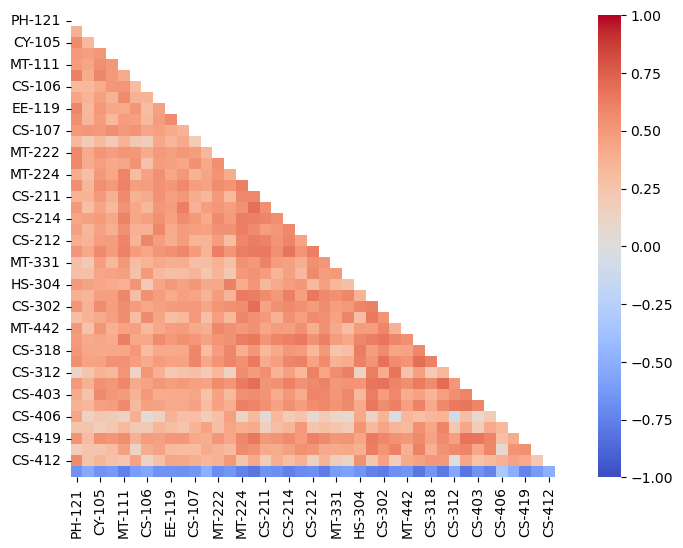

In [21]:
pt.figure(figsize=(8,6))
sb.heatmap(df.corr(),mask=np.triu(df.corr()),vmin=-1,vmax=1,cmap='coolwarm')

## Bivariate Analysis

<AxesSubplot:xlabel='PH-121', ylabel='count'>

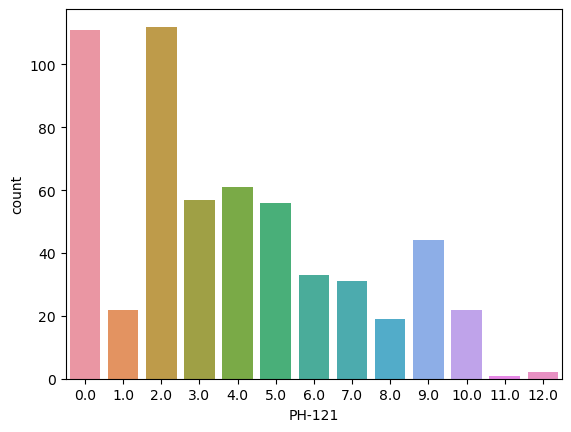

In [27]:
sb.countplot(x=df['PH-121'])

## BY USING THE BIVARIATE GRAPH ABOVE WE CAN SEE THAT MORE PEOPLE HAVE SCORE A+ AND A GRADE.

<AxesSubplot:ylabel='CGPA'>

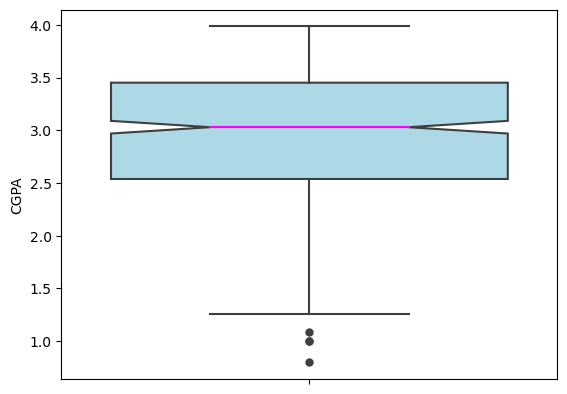

In [29]:
sb.boxplot(y=df['CGPA'],notch=True,flierprops={"marker": "o"},boxprops={"facecolor":'lightblue'},
    medianprops={"color": "magenta"})
   

From above we can see the Maximum, minimum and the median CGPA 

Now we will scale the data and skip the steps of removing outliers and skewness as its categorical data

## Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
x=df.iloc[:,:-1]
y=df['CGPA']

In [32]:
scaled_x=sc.fit_transform(x)
scaled_x

array([[ 0.40040198,  1.77089951,  1.7060756 , ...,  1.52063004,
        -0.39867967, -0.6495833 ],
       [-1.24205154,  1.4115592 ,  2.37745339, ...,  0.74848264,
         0.60860392, -0.36644432],
       [-1.24205154, -0.74448263, -0.97943555, ..., -1.56795956,
        -0.73444087, -1.21586126],
       ...,
       [-0.25657943, -1.82250355, -0.30805776, ..., -0.02366476,
        -0.73444087, -0.6495833 ],
       [-1.24205154, -0.38514232,  2.0417645 , ..., -0.40973846,
         0.27284273,  0.48297262],
       [ 0.72889268,  1.4115592 ,  2.0417645 , ..., -0.02366476,
         1.61588752,  1.04925058]])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [34]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9773118807513144 on Random State: 23


So the best random state is 23

In [35]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.25,random_state=23)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [37]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(), SVR()]

In [38]:
for m in models:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('For',m)
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred),'\n')

For LinearRegression()
R2 score : 0.9773118807513144
Mean absolute error:  0.07415040250914927
Mean squared error:  0.009542641941722465 

For RandomForestRegressor()
R2 score : 0.9508264092758775
Mean absolute error:  0.10814398601398592
Mean squared error:  0.020682453407692265 

For KNeighborsRegressor()
R2 score : 0.9635157288765976
Mean absolute error:  0.09399300699300693
Mean squared error:  0.015345314965034955 

For DecisionTreeRegressor()
R2 score : 0.8594233150447016
Mean absolute error:  0.17860139860139865
Mean squared error:  0.05912667132867133 

For SVR()
R2 score : 0.9770135518931524
Mean absolute error:  0.07061676300913616
Mean squared error:  0.009668119309111033 



## Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
for m in models:
    cvs=cross_val_score(m,scaled_x,y)
    print('For',m,'\n',cvs)
    print(cvs.mean(),'\n')

For LinearRegression() 
 [0.95916971 0.88123024 0.96119751 0.95812176 0.95357477]
0.9426587975167289 

For RandomForestRegressor() 
 [0.95629123 0.87809072 0.95557475 0.94307332 0.92814719]
0.9322354416883366 

For KNeighborsRegressor() 
 [0.95325724 0.86776504 0.95809864 0.95978154 0.9397712 ]
0.9357347337189326 

For DecisionTreeRegressor() 
 [0.81569141 0.77970587 0.88213096 0.80813461 0.76238644]
0.8096098585526006 

For SVR() 
 [0.97398697 0.94843346 0.96808077 0.96101511 0.95765283]
0.9618338295007822 



So our best model is SV Regression

We will now save it using joblib and in a user defined function for prediction

In [44]:
svr=SVR()
final_model=svr.fit(x_train, y_train)
fmod_pred = svr.predict(x_test)
fmod_acc = (r2_score(y_test, fmod_pred))*100
print('Accuracy of our best model is:',fmod_acc)

Accuracy of our best model is: 97.70135518931524


In [45]:
def studentsgrade(x):
    
    array=np.asarray(x)

    reshaped=array.reshape(1,-1)
    
    values=oe.transform(reshaped)

    prediction=svr.predict(values)

    print("The CGPA for this student is ",prediction[0])

In [50]:
studentsgrade(['B','C','B+','A','A+','A','A','A+','A+','B+','A+','A','A','A','C','D','C','B','F','B','C','A','C','A','C','A','A','A','A','F','C','B','A','A','A','C','B','D','C','B','C'])

The CGPA for this student is  2.684585122683154


In [51]:
studentsgrade(['B','C','D','A','A+','A','A','A+','A+','B+','A+','A','A','A','C','D','C','B','F','B','C','A','C','A','C','A','A','A','A','F','C','B','A','A','A','C','B','D','C','B','C'])

The CGPA for this student is  2.684593046554773
